In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Diversified_ETF')
df1

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%)
0,Diversified,ITC,Diversified,2023-12-20,451.00,459.00,459.25,449.30,10367665.0,-0.0112
1,Diversified,ITC,Diversified,2023-12-19,456.10,453.35,458.00,452.05,10268755.0,0.0099
2,Diversified,ITC,Diversified,2023-12-18,451.65,455.00,456.00,450.35,12027620.0,-0.0143
3,Diversified,ITC,Diversified,2023-12-15,458.20,461.90,462.95,455.00,15789845.0,-0.0041
4,Diversified,ITC,Diversified,2023-12-14,460.10,460.00,461.00,449.45,14370803.0,0.0098
...,...,...,...,...,...,...,...,...,...,...
14769,ETF,Nippon,ETF,2019-01-07,3147.69,3149.39,3149.40,3147.69,10.0,0.0118
14770,ETF,Nippon,ETF,2019-01-04,3111.00,3153.00,3153.00,3100.01,20.0,-0.0136
14771,ETF,Nippon,ETF,2019-01-03,3154.00,3120.00,3154.47,3120.00,30.0,0.0109
14772,ETF,Nippon,ETF,2019-01-02,3120.00,3121.00,3160.00,3120.00,40.0,-0.0127


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14774 entries, 0 to 14773
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Category   14774 non-null  object        
 1   Company    14774 non-null  object        
 2   Industry   14774 non-null  object        
 3   DATE       14774 non-null  datetime64[ns]
 4   PRICE      14774 non-null  float64       
 5   OPEN       14774 non-null  float64       
 6   HIGH       14774 non-null  float64       
 7   LOW        14774 non-null  float64       
 8   VOLUME     14774 non-null  float64       
 9   CHANGE(%)  14774 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(3)
memory usage: 1.1+ MB


In [5]:
df1.isnull().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

<Axes: >

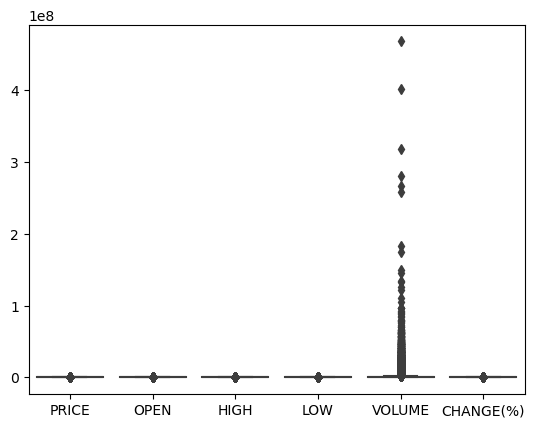

In [6]:
sns.boxplot(data=df1)

df1['DATE'] = pd.to_datetime(df1['DATE'])

# Correcting the incomplete line in the dataset
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Group by 'Company' and apply the remove_outliers function to numerical columns
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df_outliers_removed = df1.groupby('Company')[numerical_columns].apply(lambda x: x.apply(remove_outliers))

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df_outliers_removed)
plt.title('Boxplots of Numerical Columns After Removing Outliers by Company')
plt.show()

df1['DATE'] = pd.to_datetime(df1['DATE'])

df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(d):
    Q1, Q3 = np.quantile(d, q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    d1 = np.where(d < lower, lower, d)
    d1 = np.where(d1 > upper, upper, d1)
    return d1

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


df1['DATE'] = pd.to_datetime(df1['DATE'])
df1.at[14164, 'DATE'] = '2019-01-01'

def remove_outliers(column):
    Q1, Q3 = column.quantile(q=[0.25, 0.75])
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return column.apply(lambda x: max(min(x, upper), lower))

# Apply the remove_outliers function to numerical columns of the DataFrame
numerical_columns = df1.select_dtypes(include=[np.number]).columns

df1[numerical_columns] = df1[numerical_columns].apply(remove_outliers)

# Plot boxplots after removing outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df1[numerical_columns])
plt.show()


In [7]:
df1.isna().sum()

Category     0
Company      0
Industry     0
DATE         0
PRICE        0
OPEN         0
HIGH         0
LOW          0
VOLUME       0
CHANGE(%)    0
dtype: int64

In [8]:
df1.dropna(inplace=True)

In [9]:
df2=df1.copy()

df2 = df2.sort_values(by='DATE')

# Calculate daily returns for each stock
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return
14773,ETF,Nippon,ETF,2019-01-01,3159.99,3159.99,3159.99,3159.98,0.0,0.0003,NaN
6164,Diversified,3M India,Diversified,2019-01-01,20666.35,20854.95,20870.00,20625.00,517.0,-0.0076,NaN
7397,Diversified,Gujarat petronet,Diversified,2019-01-01,175.40,176.00,176.00,174.50,35780.0,-0.0026,NaN
3698,Diversified,SRF,Diversified,2019-01-01,397.80,400.00,401.59,389.60,854122.0,-0.0053,NaN
8628,ETF,Bharat 22 ETF,ETF,2019-01-01,35.92,35.77,35.95,35.55,273960.0,0.0042,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2466,Diversified,SRF,Diversified,2023-12-20,2371.10,2442.30,2494.50,2358.70,898142.0,-0.0243,-0.024299
3699,Diversified,Linde India,Diversified,2023-12-20,5524.15,5670.00,5700.00,5430.65,45338.0,-0.0210,-0.021018
1233,Diversified,Grasim,Diversified,2023-12-20,2063.55,2134.00,2135.60,2053.55,676270.0,-0.0258,-0.025823
0,Diversified,ITC,Diversified,2023-12-20,451.00,459.00,459.25,449.30,10367665.0,-0.0112,-0.011182


In [10]:

df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate additional features
df2['MA_10'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=10).mean())
df2['MA_50'] = df2.groupby('Company')['PRICE'].transform(lambda x: x.rolling(window=30).mean())
df2.head(20)


,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
6164,Diversified,3M India,Diversified,2019-01-01,20666.35,20854.95,20870.00,20625.00,517.0,-0.0076,NaN,NaN,NaN
6141,Diversified,3M India,Diversified,2019-01-02,20293.50,20160.00,20590.00,20160.00,1270.0,0.0070,-0.018041,NaN,NaN
6121,Diversified,3M India,Diversified,2019-01-03,23011.50,23098.65,23587.95,22927.00,3951.0,0.0050,0.133935,NaN,NaN
6102,Diversified,3M India,Diversified,2019-01-04,24294.75,24270.00,24800.00,24099.75,4621.0,0.0014,0.055766,NaN,NaN
6042,Diversified,3M India,Diversified,2019-01-07,23014.30,23210.00,23500.00,22765.00,1492.0,-0.0087,-0.052705,NaN,NaN
6019,Diversified,3M India,Diversified,2019-01-08,20704.10,21211.95,21293.30,20630.00,663.0,-0.0191,-0.100381,NaN,NaN
5980,Diversified,3M India,Diversified,2019-01-10,20008.20,20781.00,20781.00,19950.00,2761.0,-0.0321,-0.033612,NaN,NaN
5960,Diversified,3M India,Diversified,2019-01-11,22202.10,22497.50,22512.05,22100.00,1793.0,-0.0127,0.109650,NaN,NaN
6155,Diversified,3M India,Diversified,2019-01-14,20572.35,20954.65,20954.65,20504.15,426.0,-0.0121,-0.073405,NaN,NaN
6154,Diversified,3M India,Diversified,2019-01-15,20846.15,20551.00,20944.00,20551.00,1563.0,0.0133,0.013309,21561.330,NaN


In [11]:
df2.tail(10)

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50
2533,Diversified,SRF,Diversified,2023-12-09,2374.15,2448.95,2449.95,2365.00,319884.0,-0.0257,0.074179,2354.885,2324.686667
2513,Diversified,SRF,Diversified,2023-12-10,2264.60,2266.95,2268.05,2251.00,252564.0,0.0065,-0.046143,2345.405,2329.961667
2492,Diversified,SRF,Diversified,2023-12-11,2348.05,2368.00,2368.00,2342.00,35217.0,-0.0013,0.036850,2345.050,2335.726667
2472,Diversified,SRF,Diversified,2023-12-12,2378.50,2440.00,2454.25,2359.20,472046.0,-0.0219,0.012968,2347.730,2342.296667
2471,Diversified,SRF,Diversified,2023-12-13,2411.55,2395.00,2416.00,2378.00,501631.0,0.0139,0.013895,2352.145,2349.505000
2470,Diversified,SRF,Diversified,2023-12-14,2421.40,2427.00,2436.75,2399.25,507202.0,0.0041,0.004085,2372.355,2357.025000
2469,Diversified,SRF,Diversified,2023-12-15,2439.75,2415.00,2477.00,2415.00,621693.0,0.0076,0.007578,2373.880,2358.396667
2468,Diversified,SRF,Diversified,2023-12-18,2437.95,2439.75,2462.00,2431.00,229075.0,-0.0007,-0.000738,2362.400,2354.296667
2467,Diversified,SRF,Diversified,2023-12-19,2430.15,2445.00,2448.60,2415.00,249747.0,-0.0032,-0.003199,2371.630,2362.790000
2466,Diversified,SRF,Diversified,2023-12-20,2371.10,2442.30,2494.50,2358.70,898142.0,-0.0243,-0.024299,2387.720,2365.303333


In [12]:
# Calculate volatility (using a rolling standard deviation for the last 10 days)
df2['Volatility'] = df2.groupby('Company')['Daily_Return'].transform(lambda x: x.rolling(window=10).std())
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility
6164,Diversified,3M India,Diversified,2019-01-01,20666.35,20854.95,20870.00,20625.00,517.0,-0.0076,NaN,NaN,NaN,NaN
6141,Diversified,3M India,Diversified,2019-01-02,20293.50,20160.00,20590.00,20160.00,1270.0,0.0070,-0.018041,NaN,NaN,NaN
6121,Diversified,3M India,Diversified,2019-01-03,23011.50,23098.65,23587.95,22927.00,3951.0,0.0050,0.133935,NaN,NaN,NaN
6102,Diversified,3M India,Diversified,2019-01-04,24294.75,24270.00,24800.00,24099.75,4621.0,0.0014,0.055766,NaN,NaN,NaN
6042,Diversified,3M India,Diversified,2019-01-07,23014.30,23210.00,23500.00,22765.00,1492.0,-0.0087,-0.052705,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,Diversified,SRF,Diversified,2023-12-14,2421.40,2427.00,2436.75,2399.25,507202.0,0.0041,0.004085,2372.355,2357.025000,0.057479
2469,Diversified,SRF,Diversified,2023-12-15,2439.75,2415.00,2477.00,2415.00,621693.0,0.0076,0.007578,2373.880,2358.396667,0.049733
2468,Diversified,SRF,Diversified,2023-12-18,2437.95,2439.75,2462.00,2431.00,229075.0,-0.0007,-0.000738,2362.400,2354.296667,0.046384
2467,Diversified,SRF,Diversified,2023-12-19,2430.15,2445.00,2448.60,2415.00,249747.0,-0.0032,-0.003199,2371.630,2362.790000,0.036842


In [13]:
summary_stats = df2.groupby(['Company']).describe()
summary_stats
# Display the summary statistics

PRICE                                                  \
                   count          mean          std       min        25%   
Company                                                                    
3M India          1233.0  23138.493309  3271.652177  15887.25  20903.400   
Bharat 22 ETF     1231.0     44.055045    14.620464     22.03     34.050   
CONSUMBEES        1231.0     68.305467    15.131071     44.05     52.995   
CPSE ETF          1231.0     29.900114    10.381337     13.63     22.700   
Grasim            1233.0   1269.621087   469.314036    400.10    782.150   
Gujarat petronet  1233.0    246.939416    46.499828    150.10    210.100   
ITC               1233.0    276.373966    85.325249    147.25    209.500   
Linde India       1233.0   2192.648094  1662.367033    413.50    651.550   
MO M100 ETF       1231.0     26.461641     8.624784     12.37     17.980   
MO M50 ETF        1231.0    148.063014    34.343439     80.50    113.525   
Nippon            1221.0    820.465782  1087.002706    213.14    292.370   
SRF               1233.0   1538.902944   802.508108    393.29    722.830   

                                                   OPEN                ...  \
                       50%        75%       max   count          mean  ...   
Company                                                                ...   
3M India          22762.05  24848.150  32914.85  1233.0  23189.127818  ...   
Bharat 22 ETF        39.84     53.080     89.37  1231.0     44.330926  ...   
CONSUMBEES           68.80     80.370    102.04  1231.0     68.916491  ...   
CPSE ETF             27.07     36.750     64.94  1231.0     30.084054  ...   
Grasim             1417.15   1698.300   2127.70  1233.0   1269.684144  ...   
Gujarat petronet    244.40    281.700    374.25  1233.0    247.482360  ...   
ITC                 249.30    330.100    492.15  1233.0    276.713017  ...   
Linde India        1778.75   3377.300   6654.10  1233.0   2196.096553  ...   
MO M100 ETF          28.13     32.785     48.98  1231.0     26.741600  ...   
MO M50 ETF          155.62    177.410    218.00  1231.0    149.100195  ...   
Nippon              328.09    359.630   3602.02  1221.0    824.685700  ...   
SRF                1429.41   2322.450   2826.05  1233.0   1540.374469  ...   

                         MA_50               Volatility                      \
                           75%           max      count      mean       std   
Company                                                                       
3M India          24744.546667  30024.963333     1223.0  0.066441  0.035623   
Bharat 22 ETF        53.175917     81.852000     1221.0  0.010881  0.006346   
CONSUMBEES           79.782000     98.160333     1221.0  0.010043  0.006198   
CPSE ETF             36.360167     59.436333     1221.0  0.012736  0.006642   
Grasim             1672.012500   1955.228333     1223.0  0.080872  0.052828   
Gujarat petronet    279.367500    349.786667     1223.0  0.019353  0.008215   
ITC                 308.960833    457.475000     1223.0  0.063891  0.038225   
Linde India        3280.345000   5795.020000     1223.0  0.133629  0.080708   
MO M100 ETF          32.742333     45.874333     1221.0  0.011438  0.005969   
MO M50 ETF          175.969333    206.108333     1221.0  0.010748  0.005941   
Nippon              357.355250   3320.042333     1211.0  0.017383  0.026338   
SRF                2335.182500   2545.886667     1223.0  0.082561  0.052386   

                                                                    
                       min       25%       50%       75%       max  
Company                                                             
3M India          0.004001  0.037835  0.067225  0.093806  0.156398  
Bharat 22 ETF     0.002077  0.006965  0.009344  0.013112  0.058622  
CONSUMBEES        0.002210  0.005959  0.008570  0.011630  0.040017  
CPSE ETF          0.002576  0.008465  0.011513  0.015711  0.061366  
Grasim            0.007166  0.040259  

Text(0.5, 1.0, 'Distribution of Daily Returns')

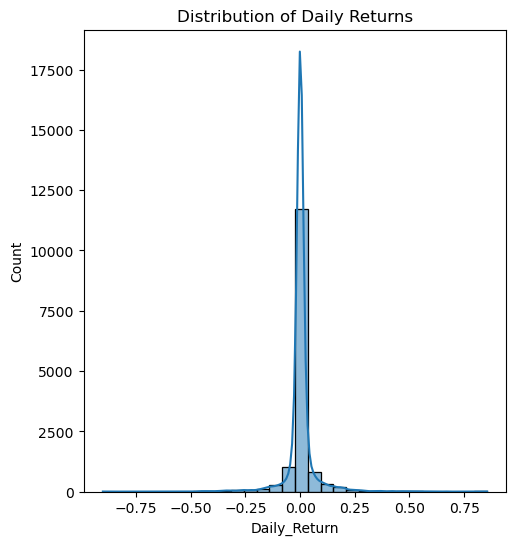

In [14]:
df2 = df2.sort_values(by=['Company', 'DATE'])

# Plot histograms for returns and trading volumes
plt.figure(figsize=(12, 6))

# Histogram for Daily Returns
plt.subplot(1, 2, 1)
sns.histplot(df2['Daily_Return'], bins=30, kde=True)
plt.title('Distribution of Daily Returns')

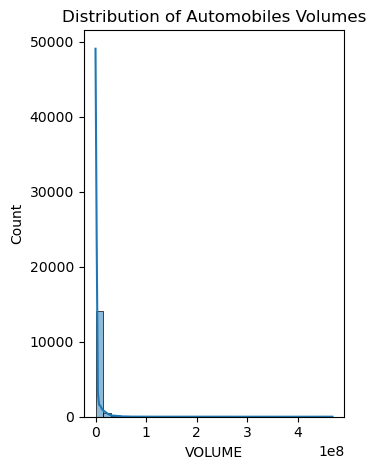

In [15]:
# Histogram for Trading Volumes
plt.subplot(1, 2, 2)
sns.histplot(df2['VOLUME'], bins=30, kde=True)
plt.title('Distribution of Automobiles Volumes')

plt.tight_layout()
plt.show()

In [16]:
correlation_matrix = df2.groupby('Company')[['Daily_Return', 'VOLUME']].corr()
correlation_matrix

Daily_Return    VOLUME
Company                                              
3M India         Daily_Return      1.000000 -0.014226
                 VOLUME           -0.014226  1.000000
Bharat 22 ETF    Daily_Return      1.000000  0.016445
                 VOLUME            0.016445  1.000000
CONSUMBEES       Daily_Return      1.000000 -0.021496
                 VOLUME           -0.021496  1.000000
CPSE ETF         Daily_Return      1.000000 -0.007786
                 VOLUME           -0.007786  1.000000
Grasim           Daily_Return      1.000000 -0.011587
                 VOLUME           -0.011587  1.000000
Gujarat petronet Daily_Return      1.000000  0.306210
                 VOLUME            0.306210  1.000000
ITC              Daily_Return      1.000000  0.042980
                 VOLUME            0.042980  1.000000
Linde India      Daily_Return      1.000000  0.115165
                 VOLUME            0.115165  1.000000
MO M100 ETF      Daily_Return      1.000000 -0.062811
                 VOLUME           -0.062811  1.000000
MO M50 ETF       Daily_Return      1.000000 -0.005655
                 VOLUME           -0.005655  1.000000
Nippon           Daily_Return      1.000000 -0.029753
                 VOLUME           -0.029753  1.000000
SRF              Daily_Return      1.000000  0.002895
                 VOLUME            0.002895  1.000000

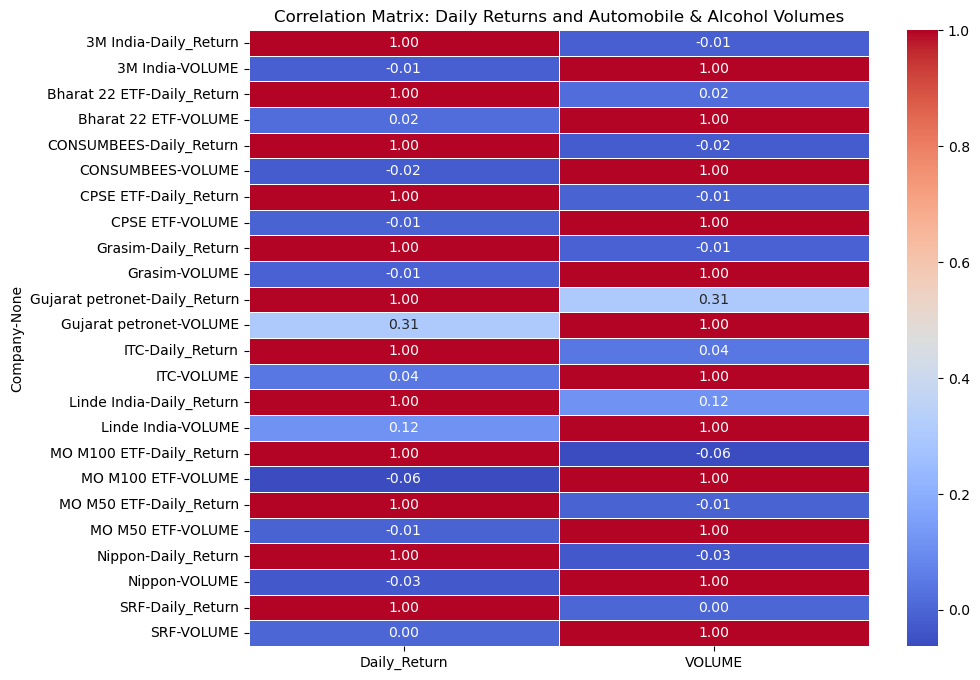

In [17]:
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns and Automobile & Alcohol Volumes')
plt.show()

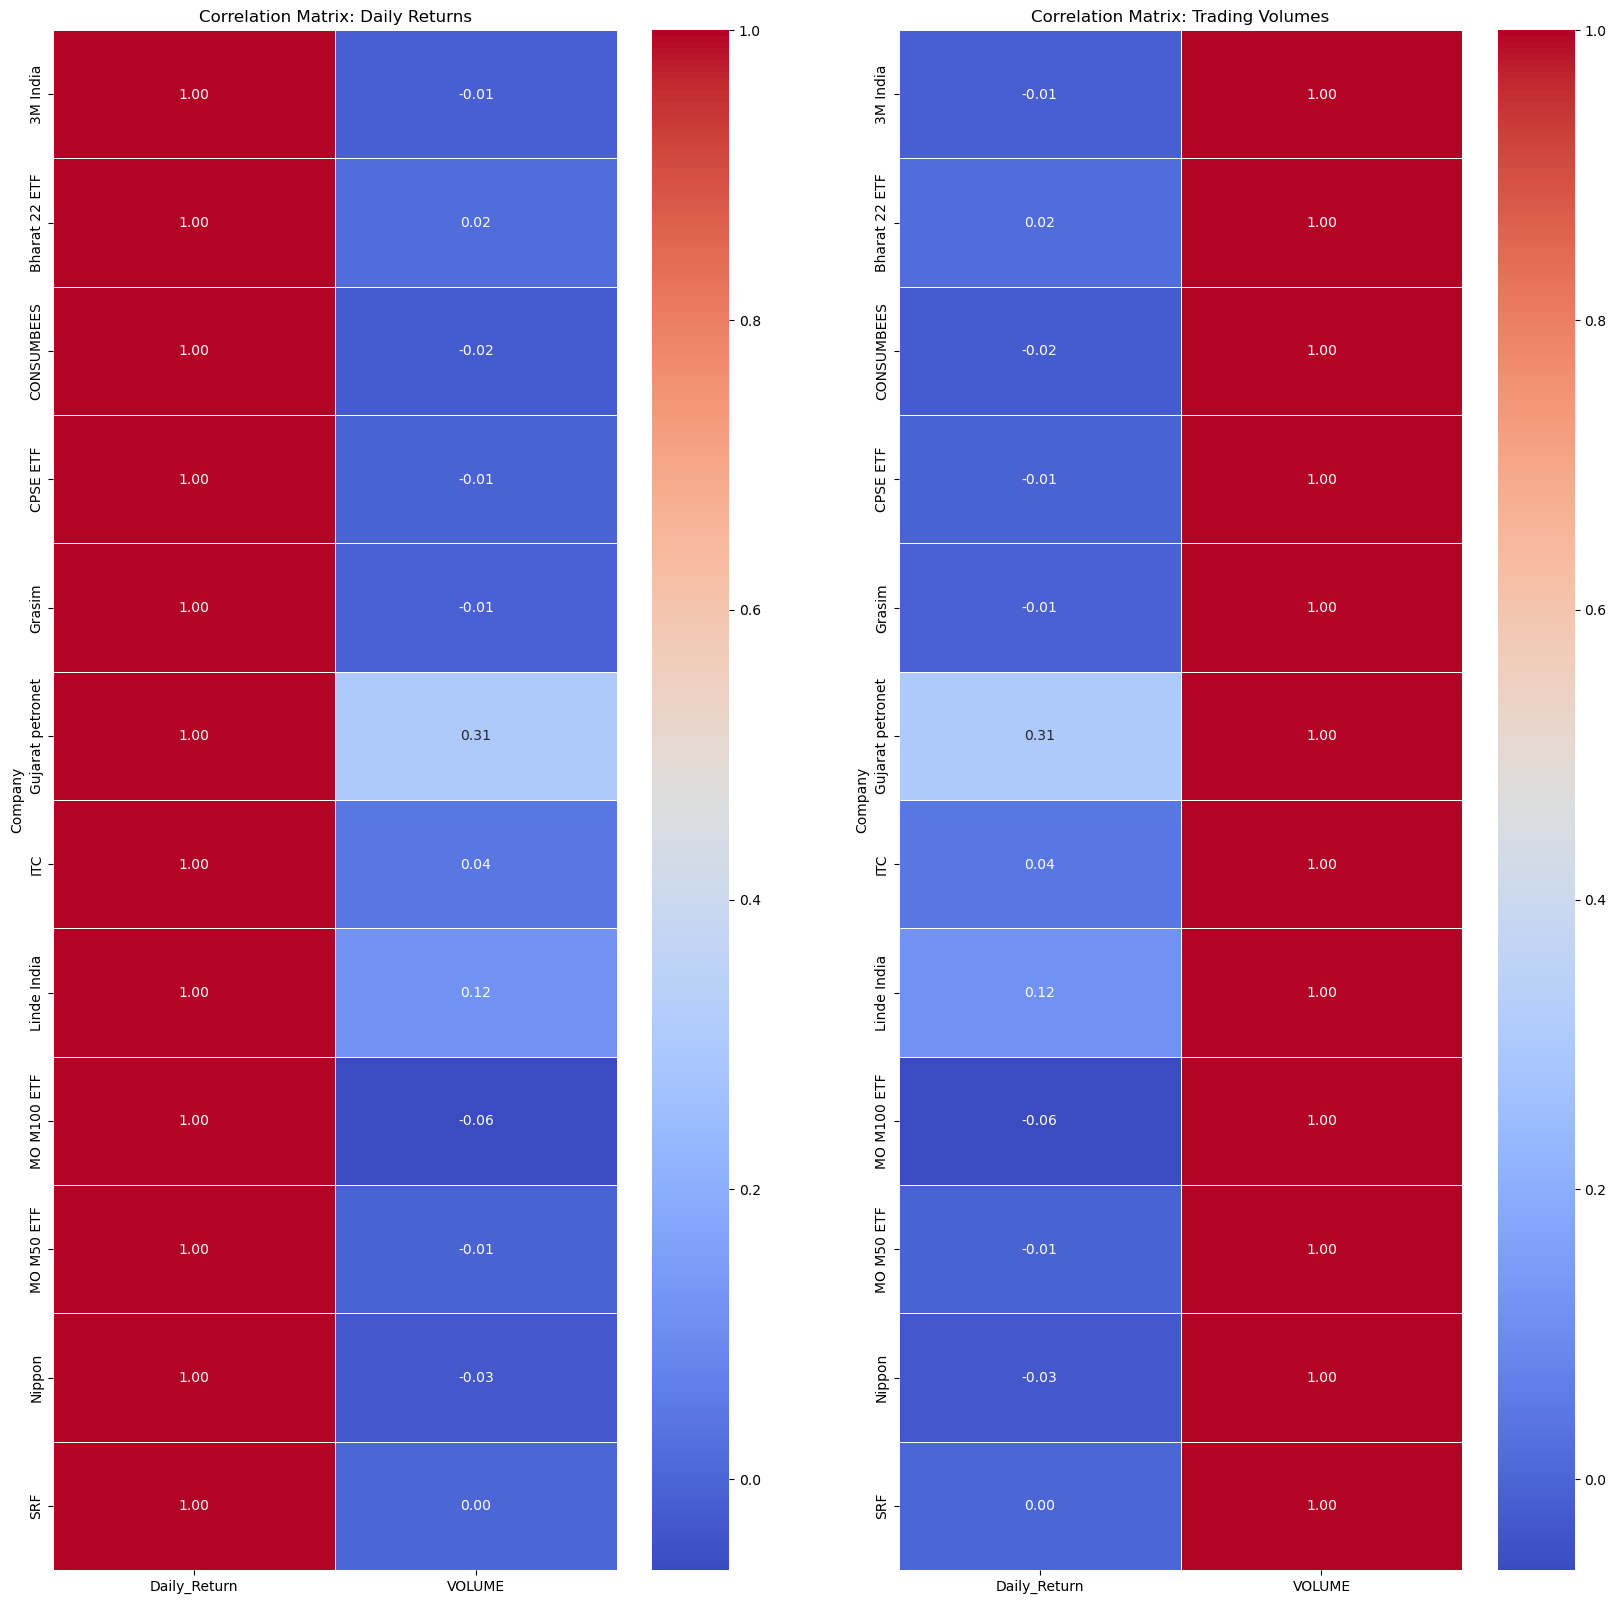

In [18]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Sort the DataFrame by 'DATE' in ascending order
df2 = df2.sort_values(by=['Company', 'DATE'])

# Calculate the correlation matrix
correlation_matrix = df2.groupby(['Company'])[['Daily_Return', 'VOLUME']].corr().unstack()

# Visualize the correlation matrices
plt.figure(figsize=(20, 20))

# Correlation matrix for Daily Returns
plt.subplot(1, 2, 1)
sns.heatmap(correlation_matrix['Daily_Return'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Daily Returns')

# Correlation matrix for Trading Volumes
plt.subplot(1, 2, 2)
sns.heatmap(correlation_matrix['VOLUME'], annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix: Trading Volumes')

#plt.tight_layout()
plt.show()


In [19]:
grouped_df = df2.groupby('Company')
grouped_df['Daily_Return'].describe()

,count,mean,std,min,25%,50%,75%,max
Company,,,,,,,,
3M India,1232.0,0.002957,0.072575,-0.304961,-0.016322,-0.001173,0.019043,0.319853
Bharat 22 ETF,1230.0,0.000798,0.012787,-0.111436,-0.005455,0.001352,0.007719,0.060009
CONSUMBEES,1230.0,0.000598,0.011667,-0.100056,-0.005033,0.000548,0.006514,0.069558
CPSE ETF,1230.0,0.000885,0.014535,-0.105935,-0.007036,0.001143,0.008594,0.097579
Grasim,1232.0,0.005260,0.093229,-0.416478,-0.013647,0.003527,0.031414,0.667087
Gujarat petronet,1232.0,0.000626,0.020937,-0.111796,-0.011577,-0.000197,0.011209,0.095018
ITC,1232.0,0.003036,0.071772,-0.363493,-0.014319,0.000487,0.017895,0.386139
Linde India,1232.0,0.013041,0.150864,-0.618461,-0.019916,0.002011,0.033163,0.855350
MO M100 ETF,1230.0,0.000851,0.012997,-0.067119,-0.004943,0.001578,0.007391,0.081664


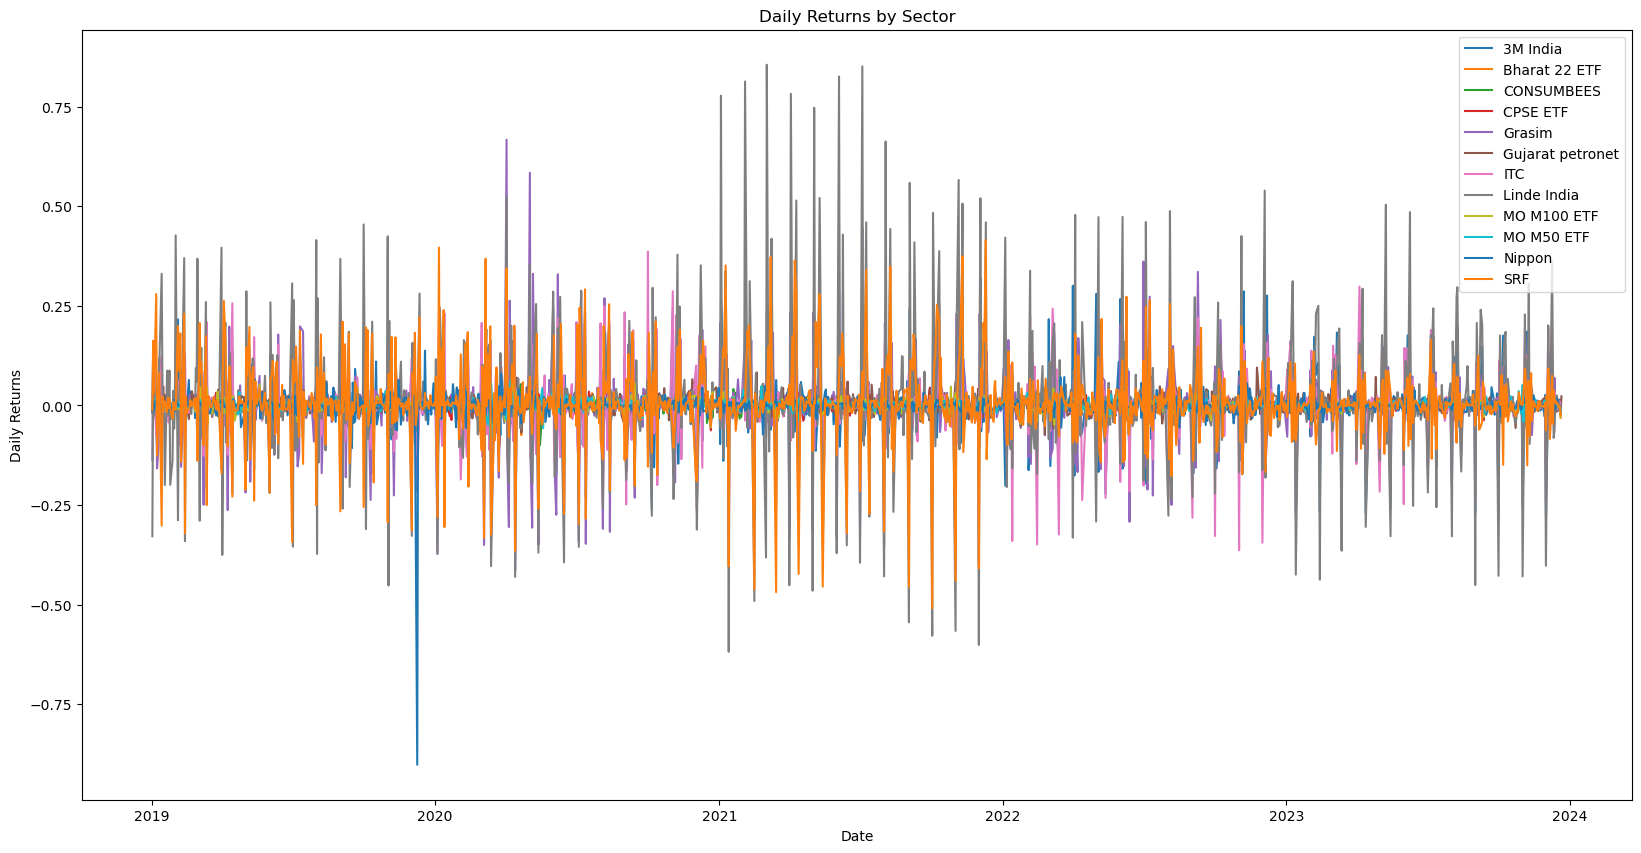

In [20]:
# Example: Line chart
plt.figure(figsize=(20, 10))
for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name)

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.show()


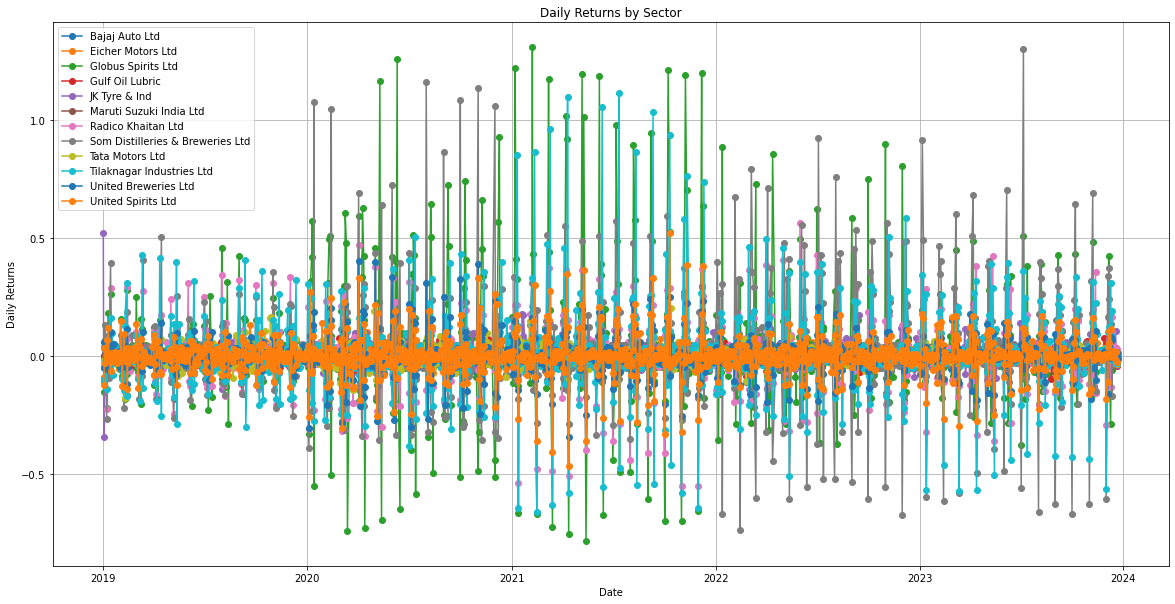

In [23]:


plt.figure(figsize=(20, 10))

for name, group in grouped_df:
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Daily Returns by Sector')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.legend()
plt.grid(True)
plt.show()


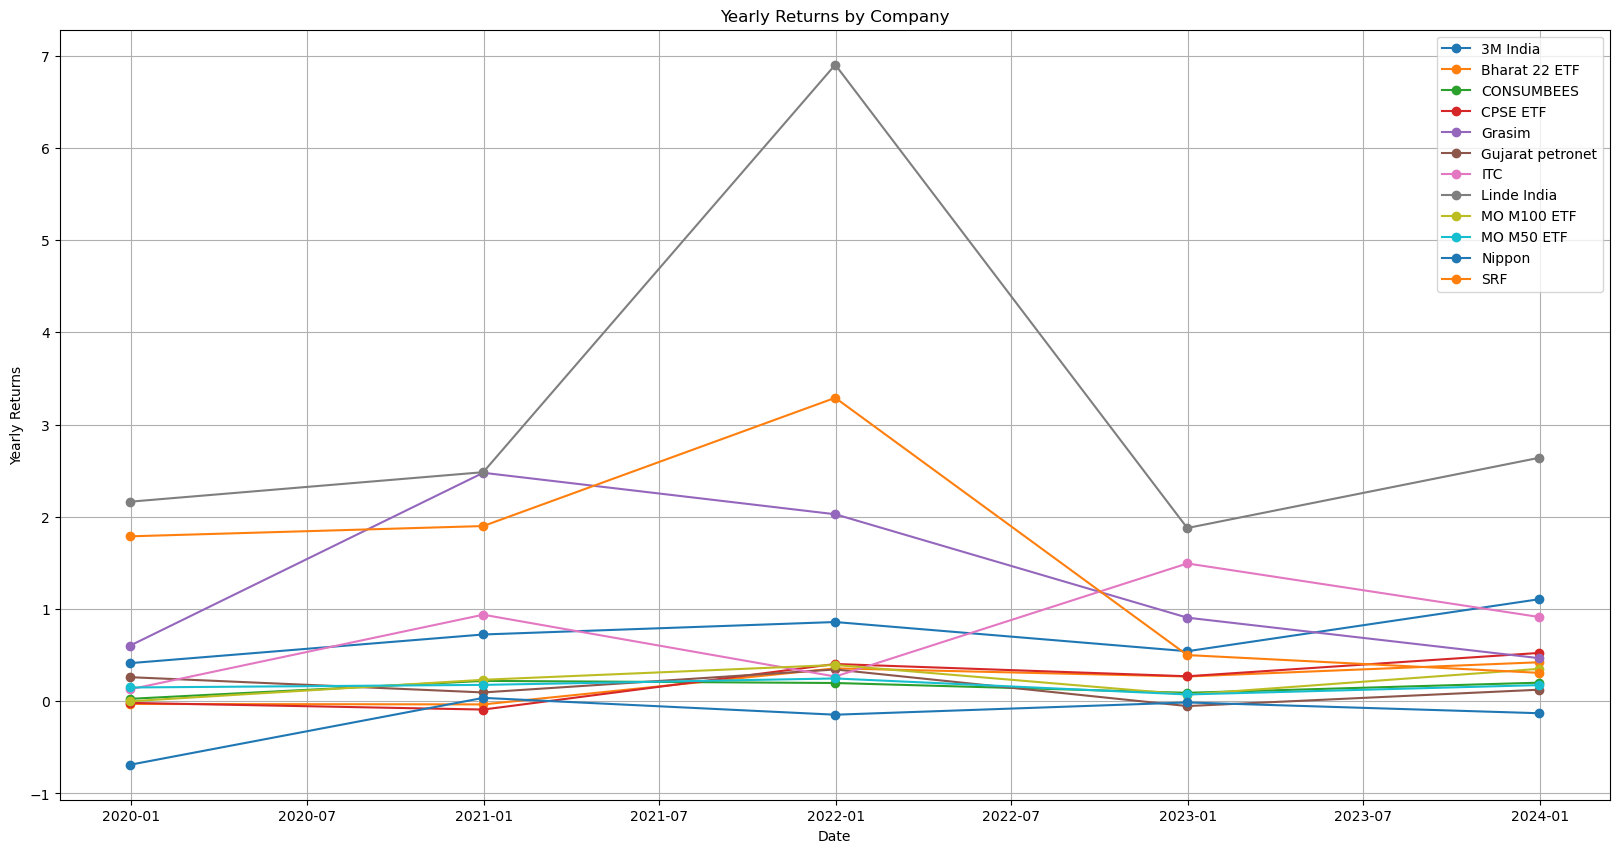

In [21]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate yearly returns
df2_yearly = df2.set_index('DATE').groupby(['Company', pd.Grouper(freq='Y')])['Daily_Return'].sum().reset_index()

# Plotting
plt.figure(figsize=(20, 10))

for name, group in df2_yearly.groupby('Company'):
    plt.plot(group['DATE'], group['Daily_Return'], label=name, marker='o', linestyle='-')

plt.title('Yearly Returns by Company')
plt.xlabel('Date')
plt.ylabel('Yearly Returns')
plt.legend()
plt.grid(True)
plt.show()


Laggards within Each Category:
                      Category                  Company  Cumulative_Return
Category                                                                  
Real Estate 1048   Real Estate                      DLF          -0.186714
Trading     13861      Trading  Uniphos Enterprises Ltd          -0.893942


D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
D:\Anaconda\New folder\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


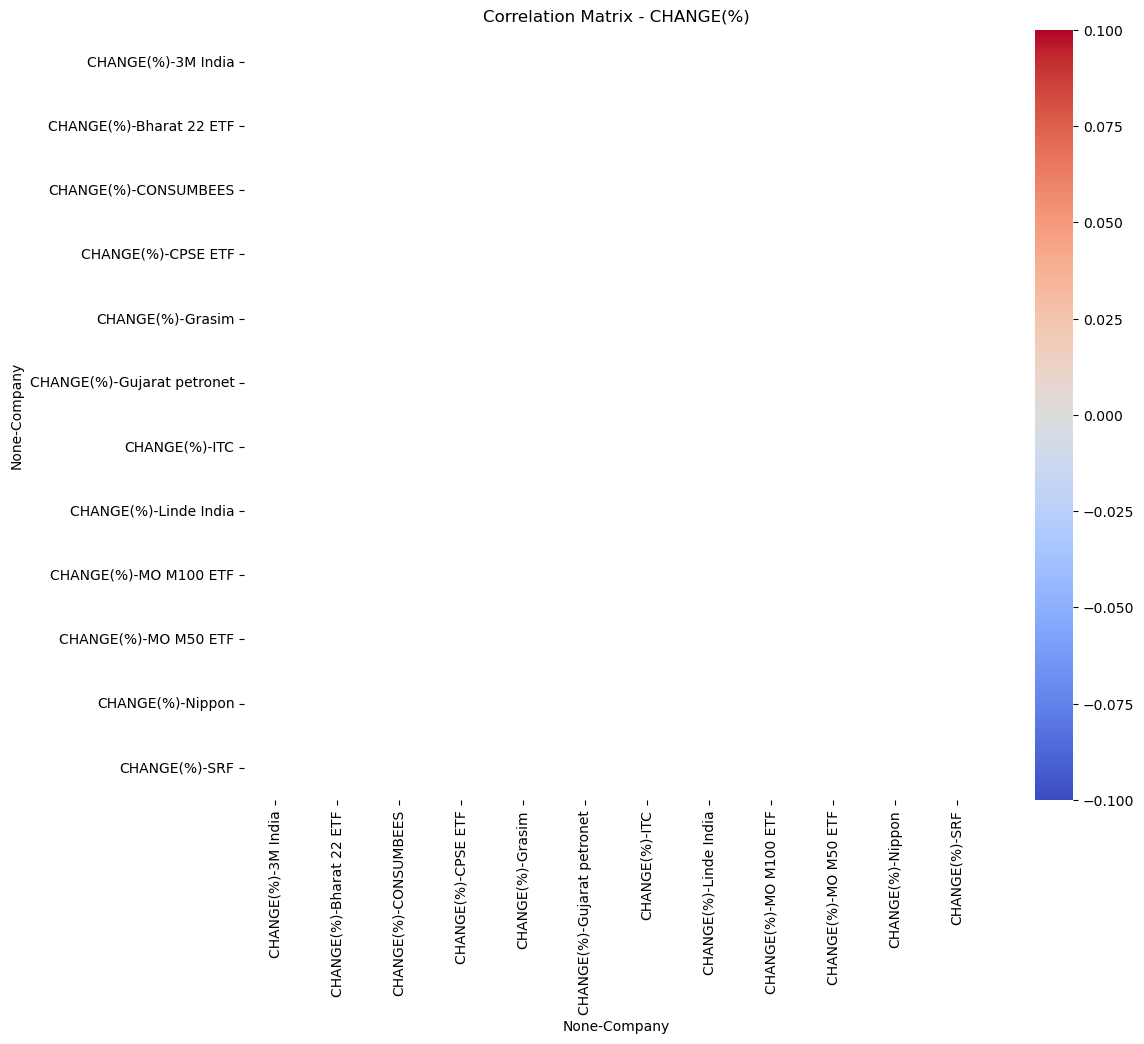

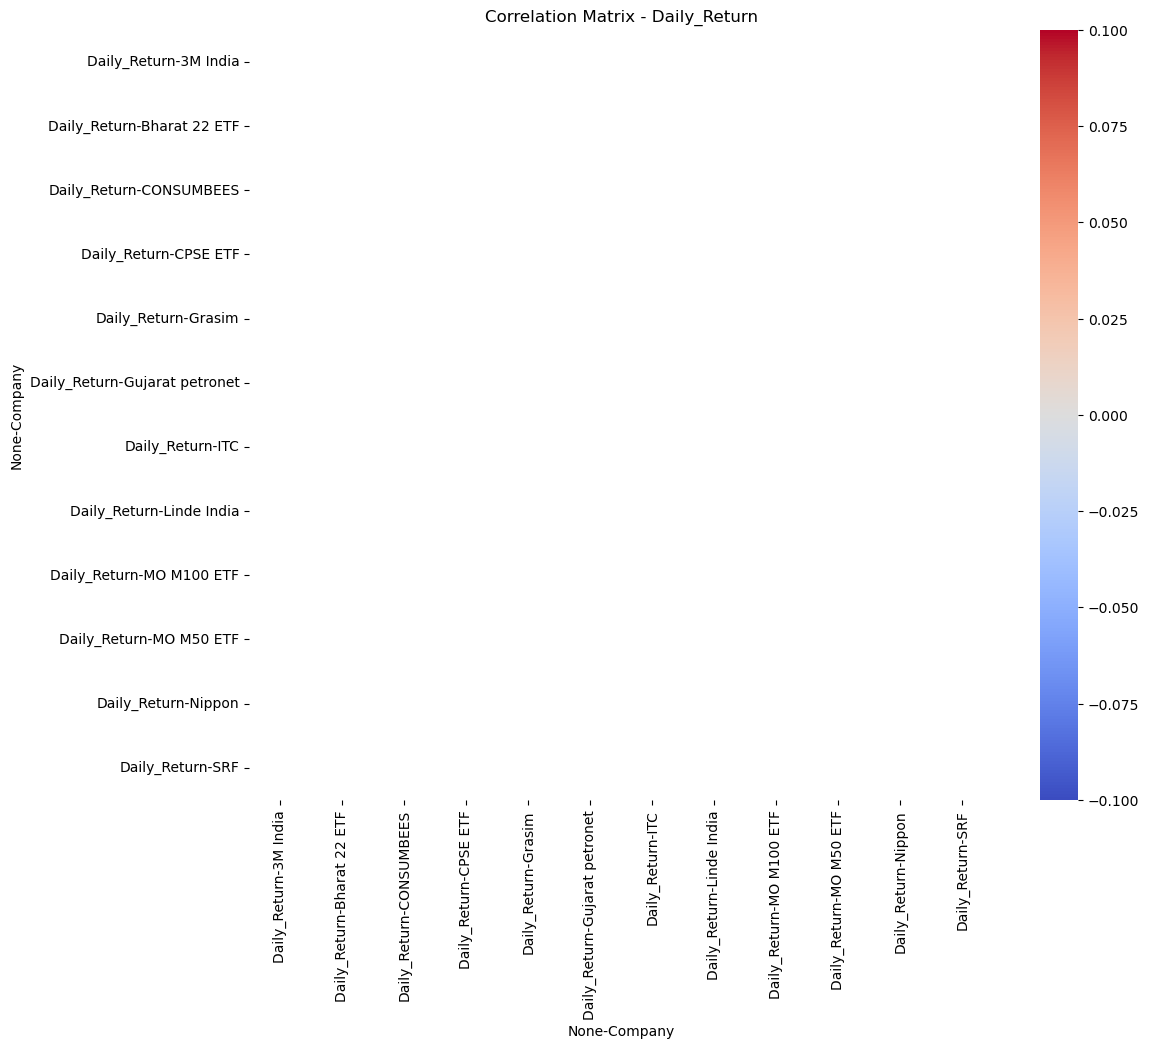

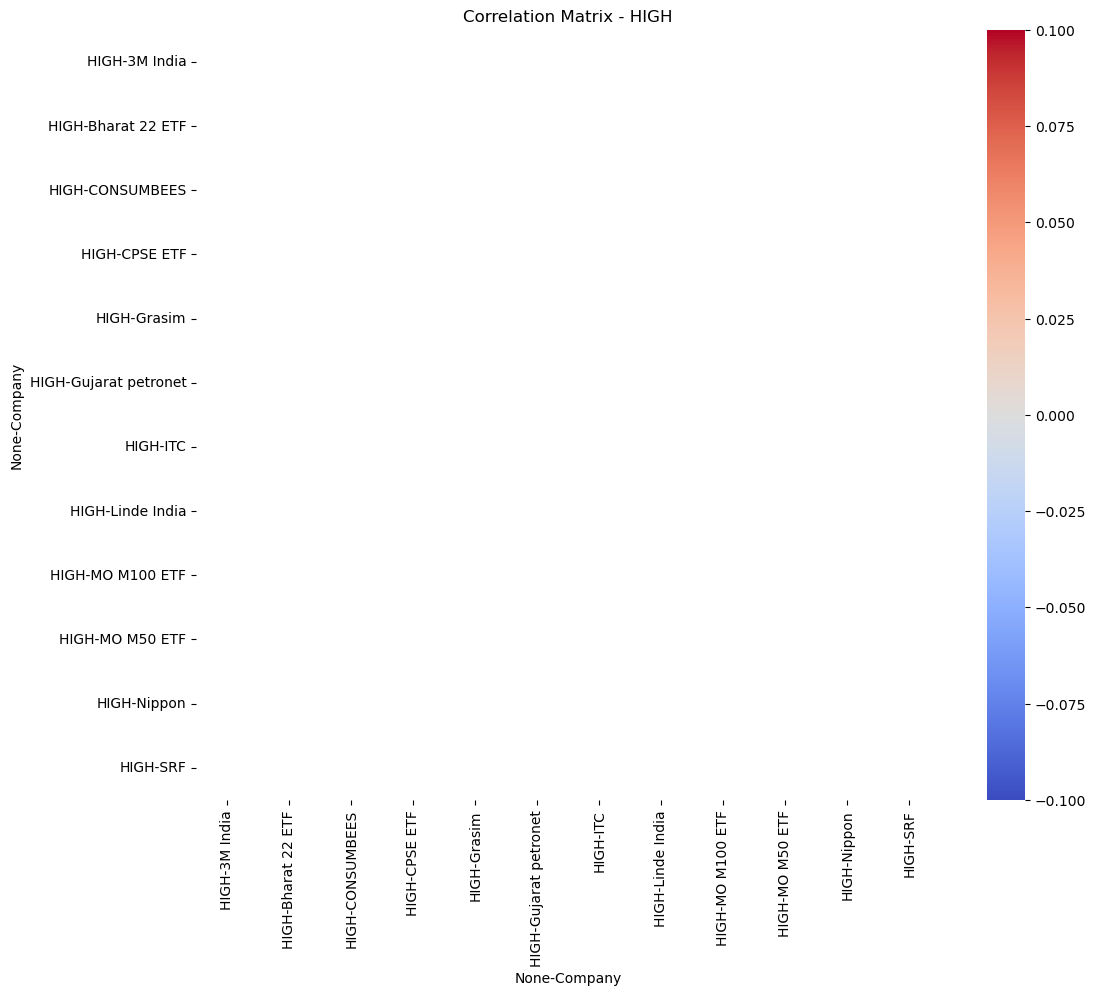

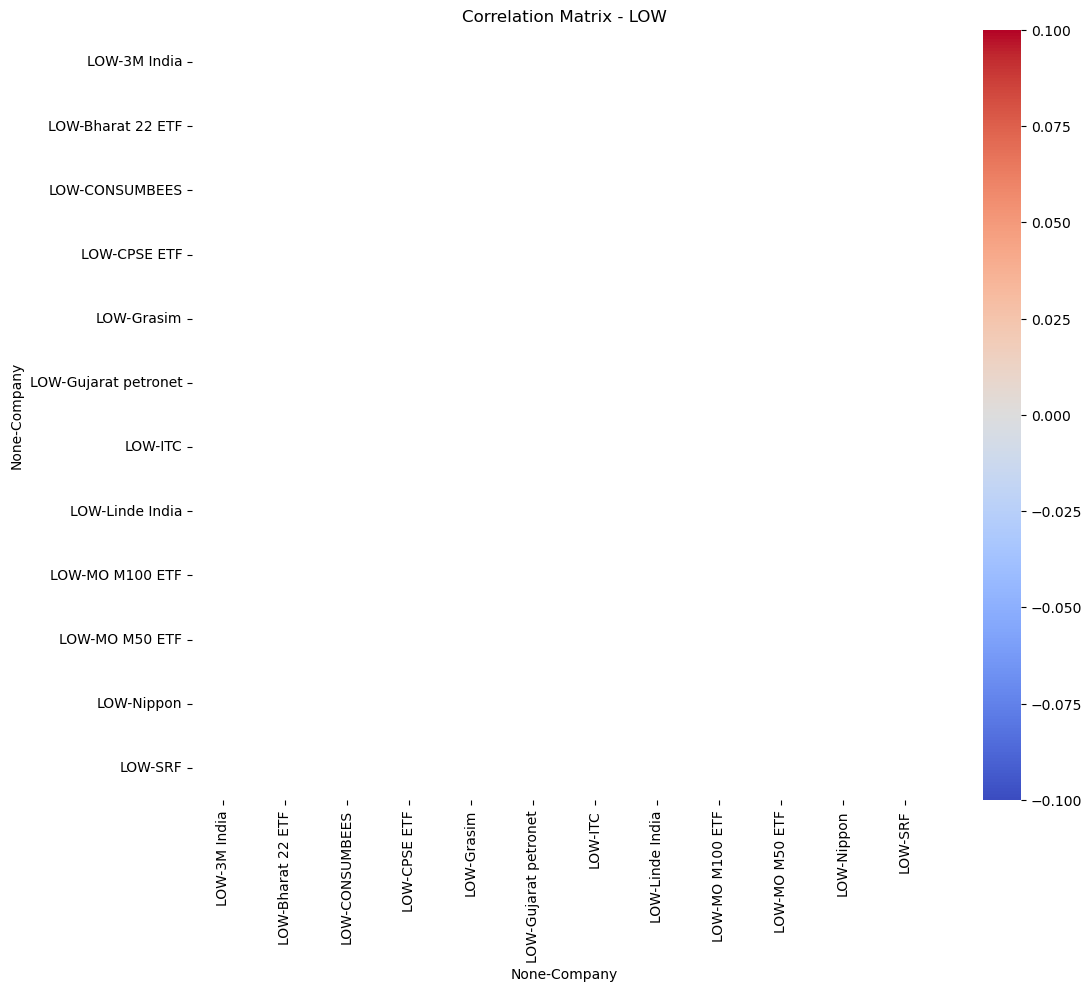

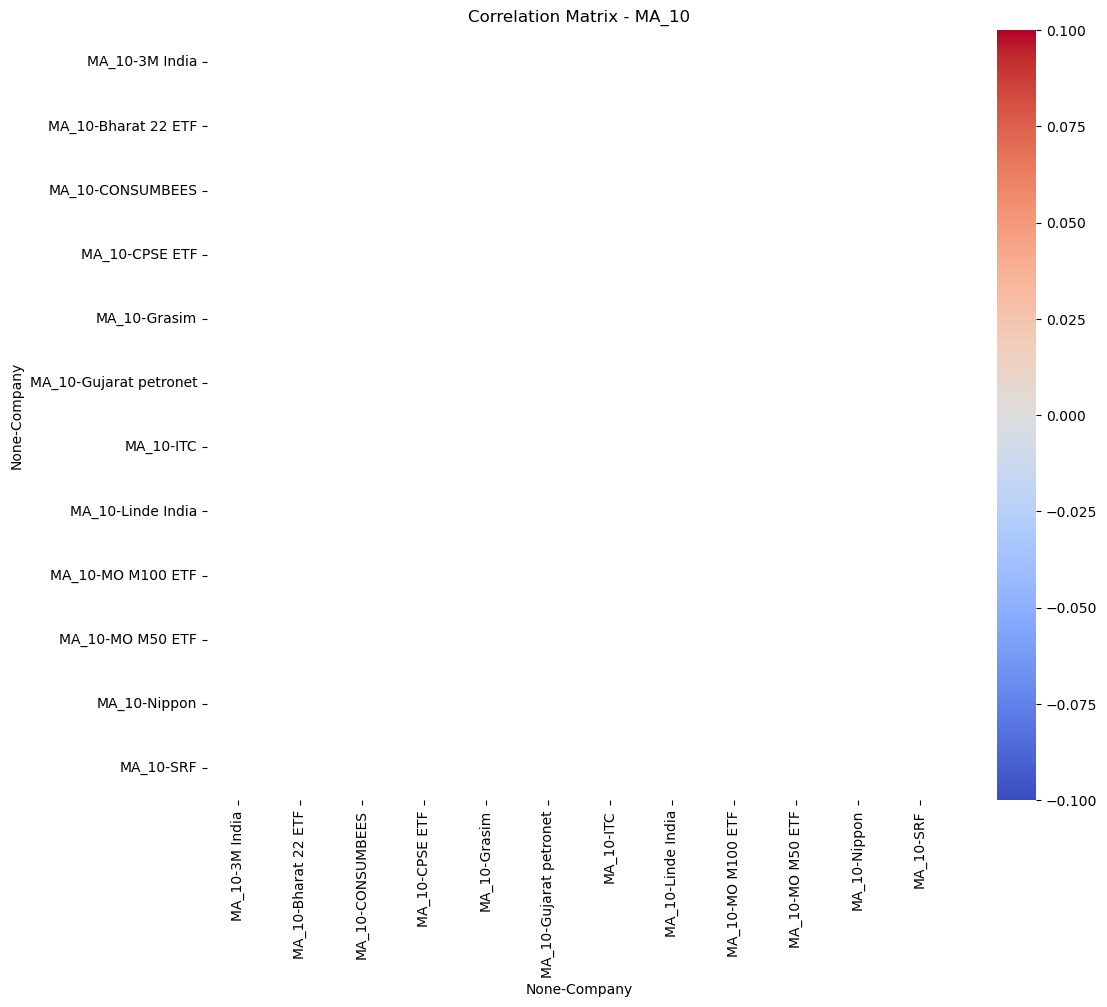

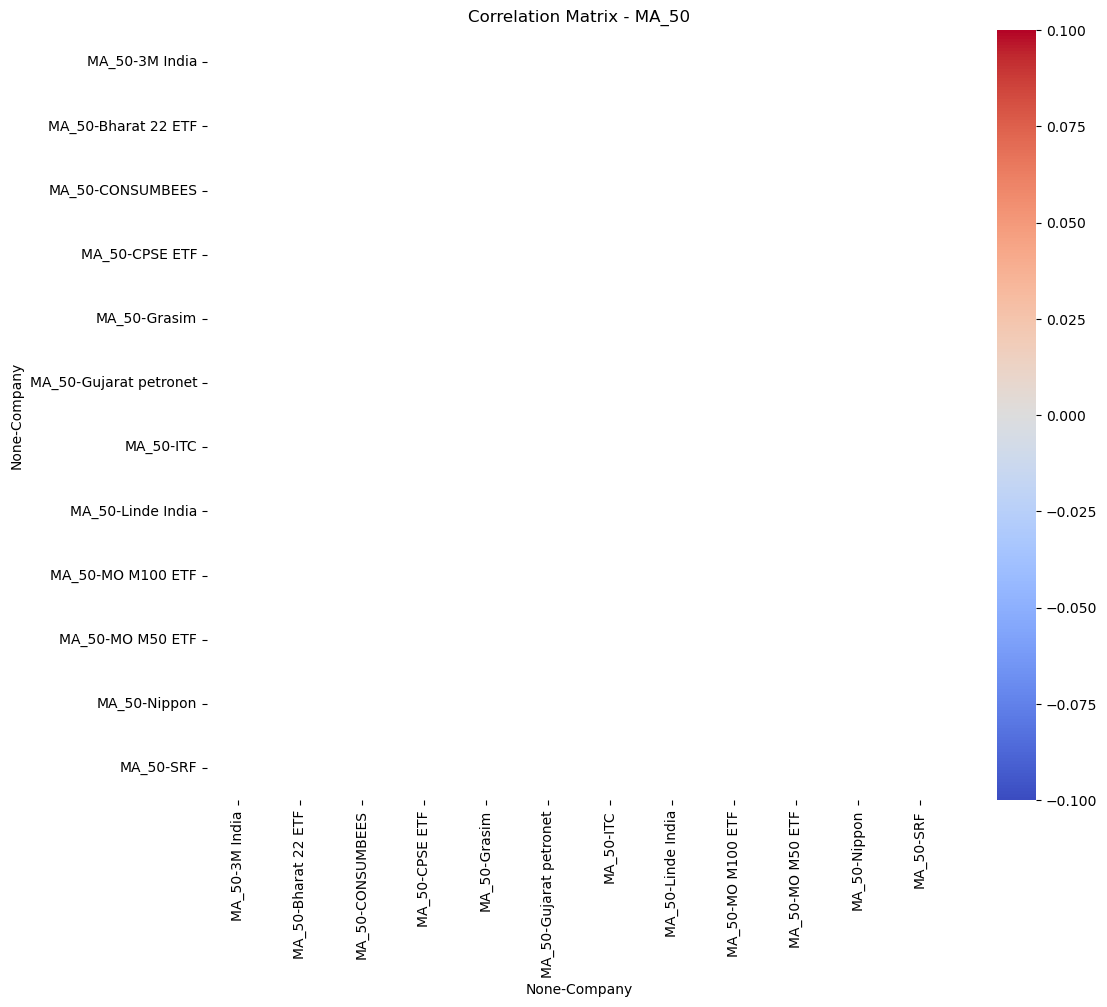

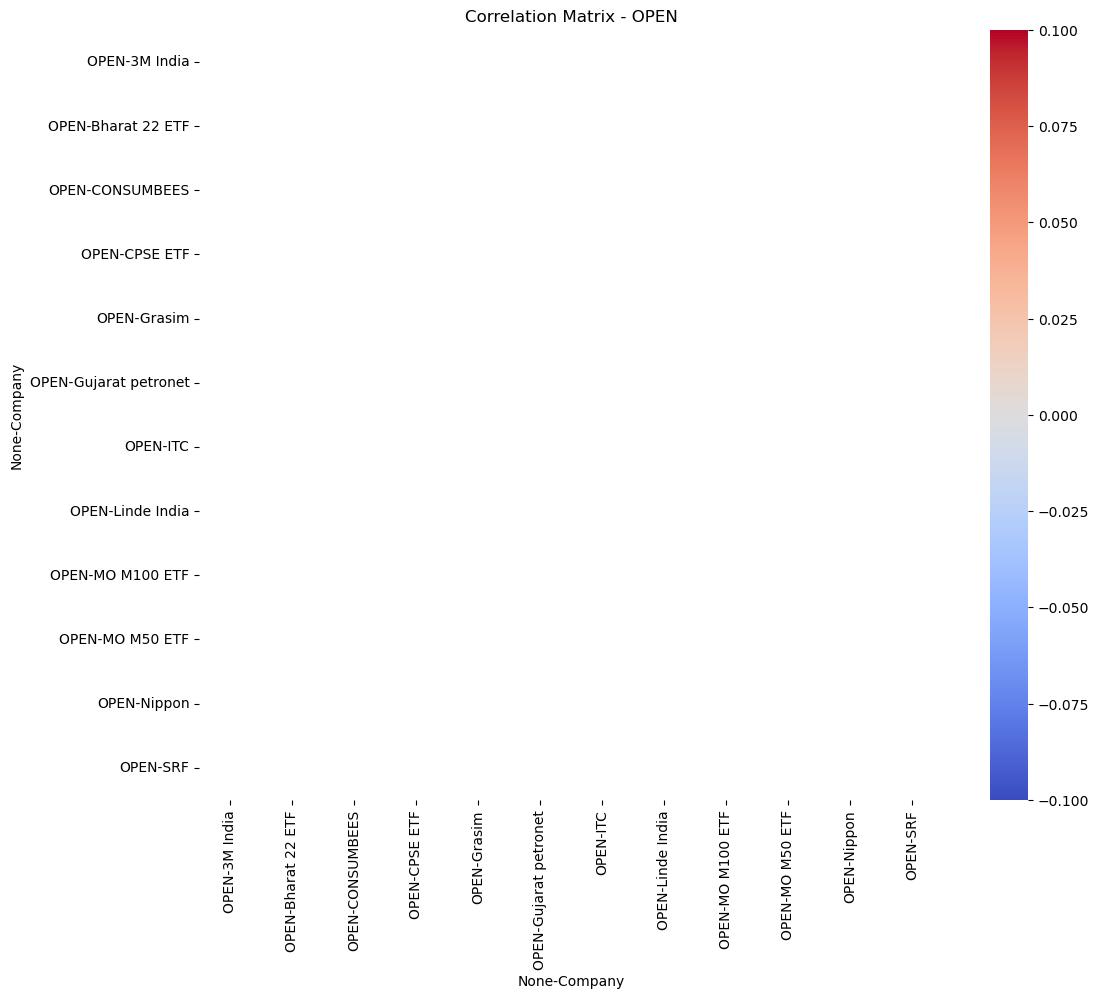

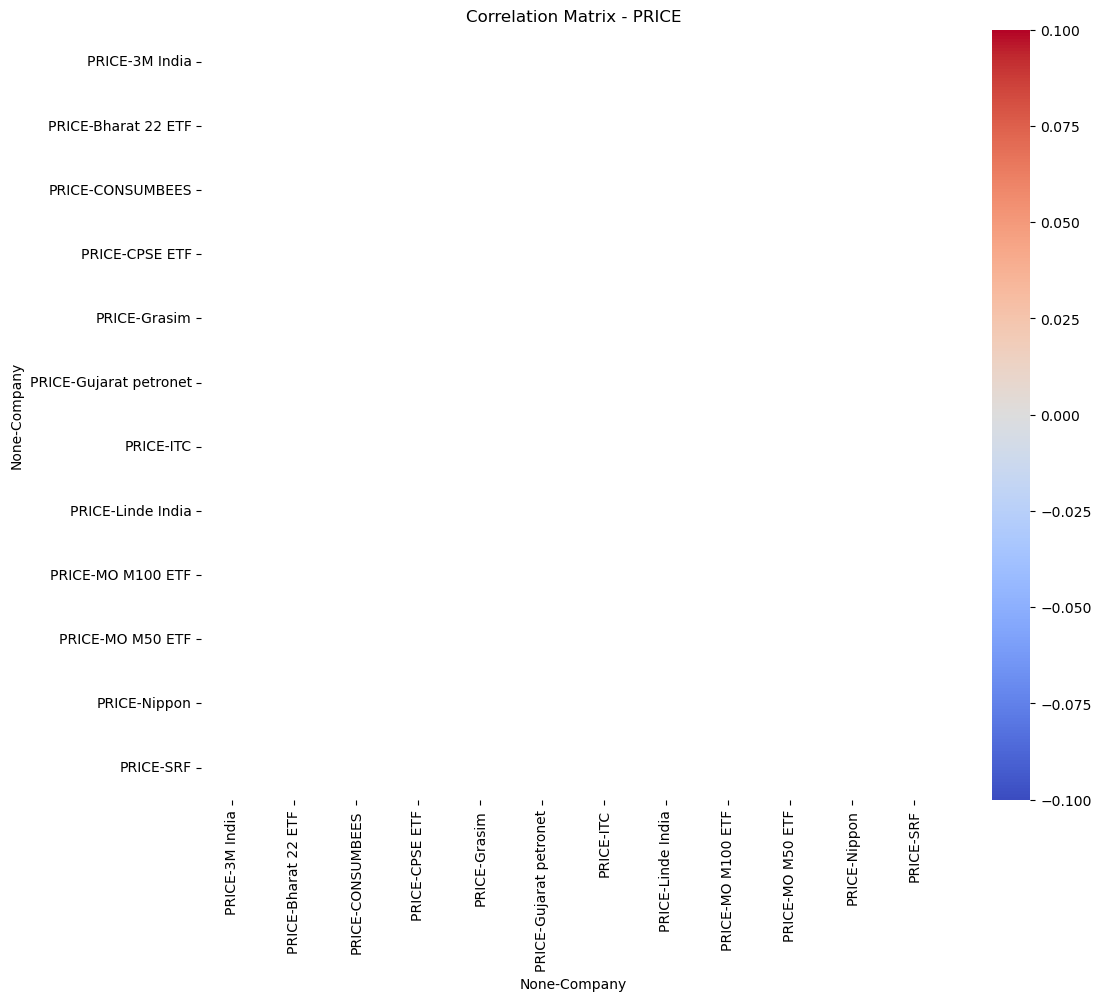

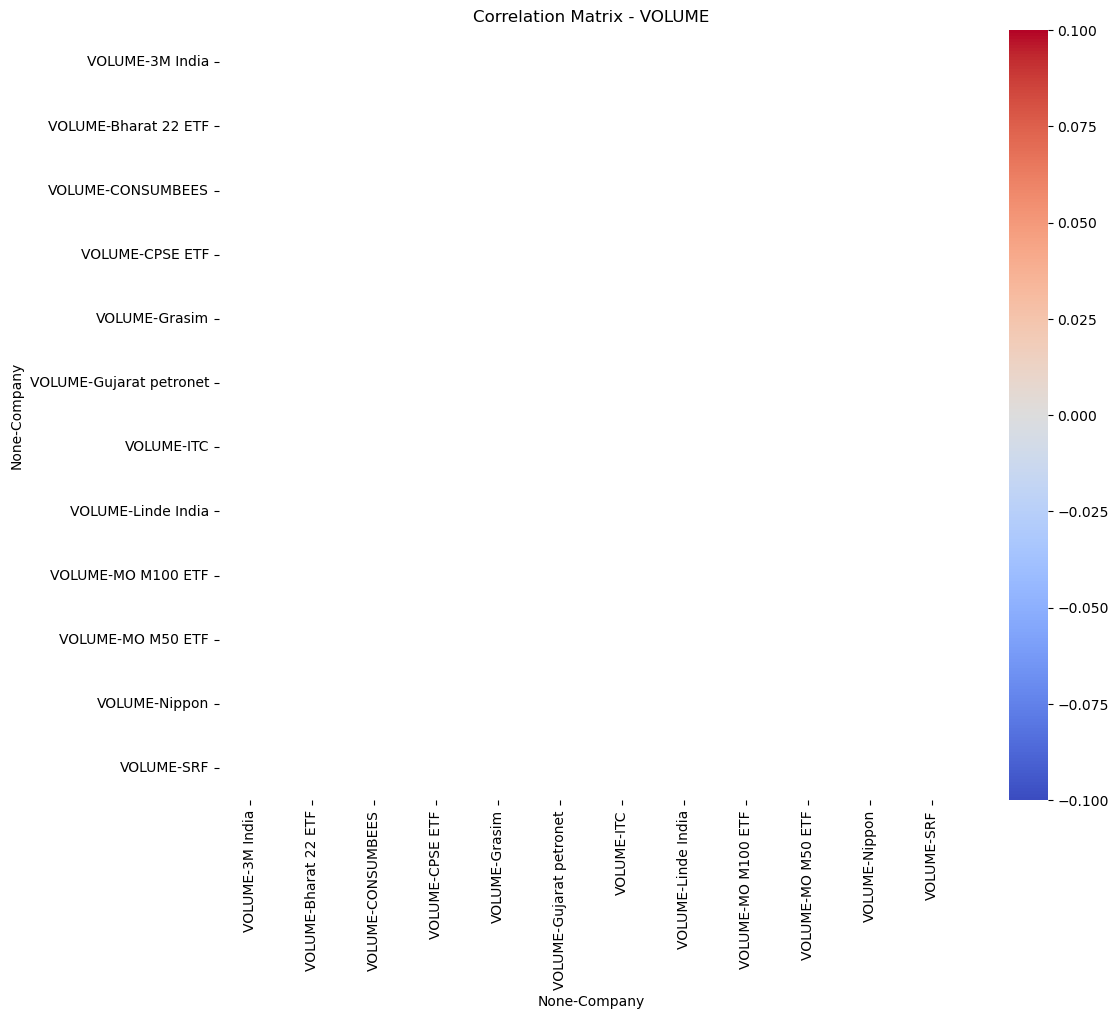

In [22]:

columns_of_interest = ['PRICE', 'OPEN', 'HIGH', 'LOW', 'VOLUME', 'CHANGE(%)', 'Daily_Return', 'MA_10', 'MA_50', 'Category','Company']

# Select relevant columns from the DataFrame
df_subset = df2[columns_of_interest]

# Create a pivot table to separate the data by 'Category'
pivot_table = df_subset.pivot_table(index='Category', columns='Company', values=columns_of_interest[:-1], aggfunc='mean')

# Calculate correlation matrix for each 'Category'
correlation_matrices = {}
for category, data in pivot_table.groupby(level=0, axis=1):
    correlation_matrices[category] = data.corr()

# Plot correlation matrices
for category, matrix in correlation_matrices.items():
    plt.figure(figsize=(12, 10))
    sns.heatmap(matrix, annot=True, cmap='coolwarm', linewidths=.5)
    plt.title(f'Correlation Matrix - {category}')
    plt.show()


In [23]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])

Laggards within Each Category:
                      Category      Company  Cumulative_Return
Category                                                      
Diversified 4908   Diversified  Linde India          -0.328547
ETF         13836          ETF       Nippon          -1.119462


In [24]:
df2

,Category,Company,Industry,DATE,PRICE,OPEN,HIGH,LOW,VOLUME,CHANGE(%),Daily_Return,MA_10,MA_50,Volatility,Cumulative_Return
6164,Diversified,3M India,Diversified,2019-01-01,20666.35,20854.95,20870.00,20625.00,517.0,-0.0076,NaN,NaN,NaN,NaN,NaN
6141,Diversified,3M India,Diversified,2019-01-02,20293.50,20160.00,20590.00,20160.00,1270.0,0.0070,-0.018041,NaN,NaN,NaN,-0.018041
6121,Diversified,3M India,Diversified,2019-01-03,23011.50,23098.65,23587.95,22927.00,3951.0,0.0050,0.133935,NaN,NaN,NaN,0.115893
6102,Diversified,3M India,Diversified,2019-01-04,24294.75,24270.00,24800.00,24099.75,4621.0,0.0014,0.055766,NaN,NaN,NaN,0.171659
6042,Diversified,3M India,Diversified,2019-01-07,23014.30,23210.00,23500.00,22765.00,1492.0,-0.0087,-0.052705,NaN,NaN,NaN,0.118954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470,Diversified,SRF,Diversified,2023-12-14,2421.40,2427.00,2436.75,2399.25,507202.0,0.0041,0.004085,2372.355,2357.025000,0.057479,7.805228
2469,Diversified,SRF,Diversified,2023-12-15,2439.75,2415.00,2477.00,2415.00,621693.0,0.0076,0.007578,2373.880,2358.396667,0.049733,7.812806
2468,Diversified,SRF,Diversified,2023-12-18,2437.95,2439.75,2462.00,2431.00,229075.0,-0.0007,-0.000738,2362.400,2354.296667,0.046384,7.812068
2467,Diversified,SRF,Diversified,2023-12-19,2430.15,2445.00,2448.60,2415.00,249747.0,-0.0032,-0.003199,2371.630,2362.790000,0.036842,7.808869


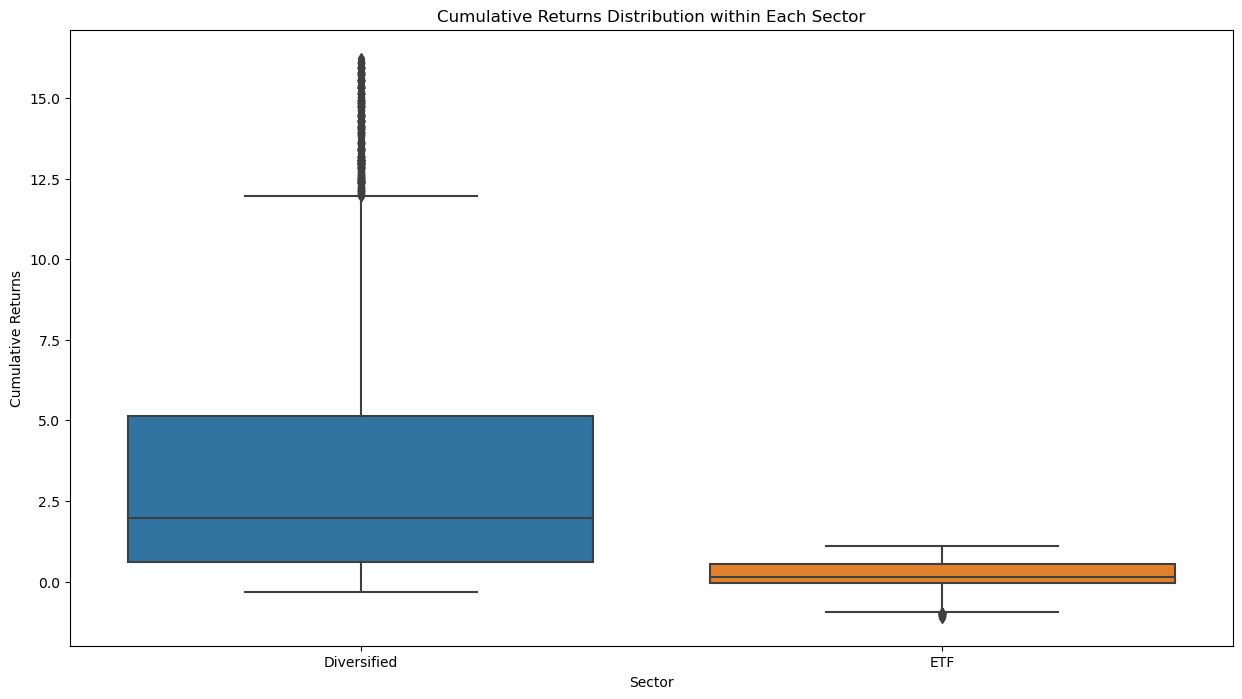

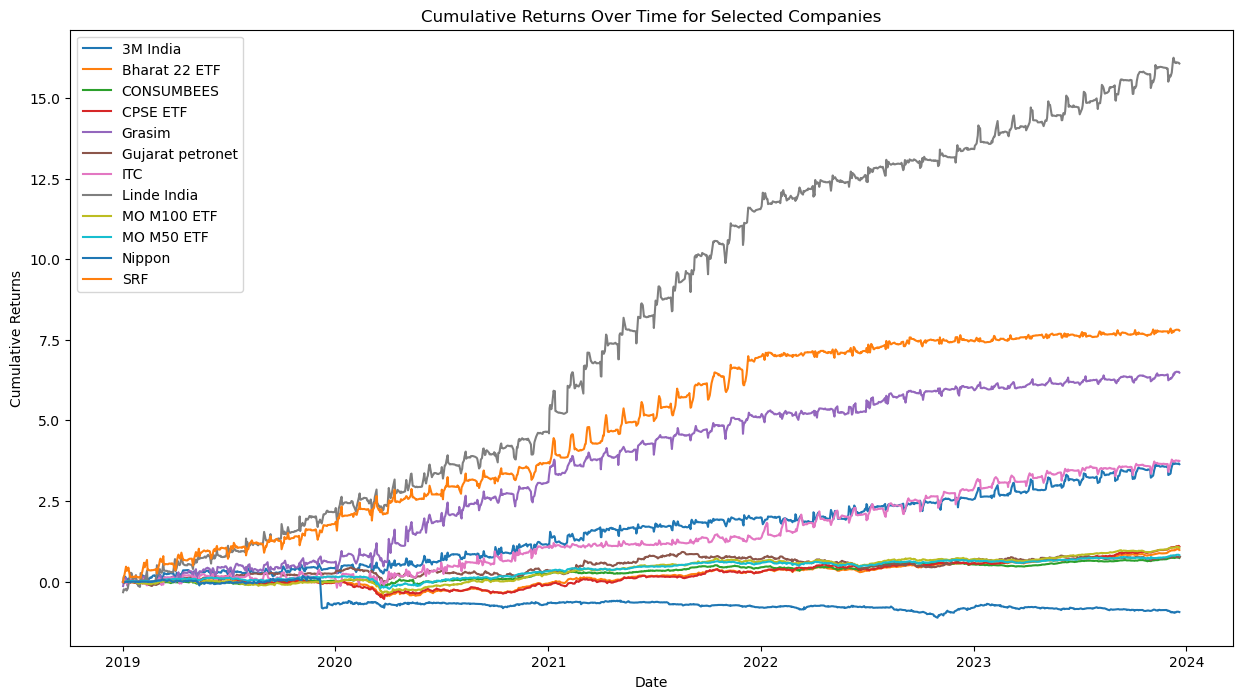

Statistical Summary of Cumulative Returns within Each Sector:


,count,mean,std,min,25%,50%,75%,max
Category,,,,,,,,
Diversified,7392.0,3.326630,3.703824,-0.328547,0.598025,1.982251,5.140417,16.246537
ETF,7370.0,0.143544,0.473156,-1.119462,-0.055416,0.134556,0.546659,1.109926


In [26]:

plt.figure(figsize=(15, 8))
sns.boxplot(x='Category', y='Cumulative_Return', data=df2)
plt.title('Cumulative Returns Distribution within Each Sector')
plt.xlabel('Sector')
plt.ylabel('Cumulative Returns')
plt.show()

# Line chart to compare Cumulative Returns over time for select companies
selected_companies = ['3M India','Bharat 22 ETF','CONSUMBEES','CPSE ETF','Grasim','Gujarat petronet','ITC','Linde India','MO M100 ETF','MO M50 ETF','Nippon','SRF']  # Replace with actual company names
plt.figure(figsize=(15, 8))
for company in selected_companies:
    company_data = df2[df2['Company'] == company]
    plt.plot(company_data['DATE'], company_data['Cumulative_Return'], label=company)

plt.title('Cumulative Returns Over Time for Selected Companies')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

# Statistical summary to compare mean, median, etc. of Cumulative Returns within each sector
summary_stats = df2.groupby('Category')['Cumulative_Return'].describe()
print("Statistical Summary of Cumulative Returns within Each Sector:")
summary_stats


In [27]:


# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Leaders within Each Category (Top 1)
leaders = df2.groupby('Category').apply(lambda x: x.nlargest(1, 'Cumulative_Return'))

# Display the results
print("Leaders within Each Category:")
print(leaders[['Category', 'Company', 'Cumulative_Return']])


Leaders within Each Category:
                     Category      Company  Cumulative_Return
Category                                                     
Diversified 3746  Diversified  Linde India          16.246537
ETF         8630          ETF     CPSE ETF           1.109926


In [28]:
# Calculate Cumulative Returns within each category
df2['Cumulative_Return'] = df2.groupby(['Category', 'Company'])['Daily_Return'].cumsum()

# Identify Laggards within Each Category (Bottom 1)
laggards = df2.groupby('Category').apply(lambda x: x.nsmallest(1, 'Cumulative_Return'))

# Display the results
print("Laggards within Each Category:")
print(laggards[['Category', 'Company', 'Cumulative_Return']])


Laggards within Each Category:
                      Category      Company  Cumulative_Return
Category                                                      
Diversified 4908   Diversified  Linde India          -0.328547
ETF         13836          ETF       Nippon          -1.119462


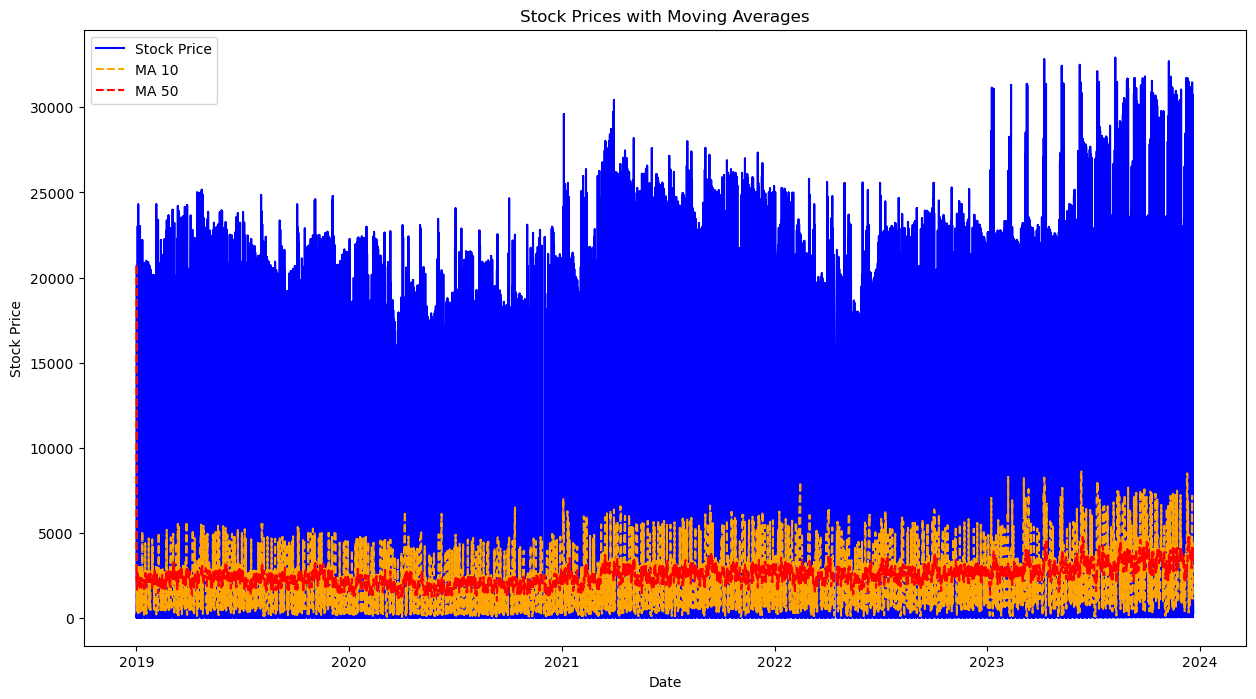

In [29]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df2 = df2.sort_values(by='DATE')

# Calculate Simple Moving Averages (SMA) for 10 and 50 days
df2['MA_10'] = df2['PRICE'].rolling(window=10, min_periods=1).mean()
df2['MA_50'] = df2['PRICE'].rolling(window=50, min_periods=1).mean()

# Plot the stock prices and moving averages
plt.figure(figsize=(15, 8))
plt.plot(df2['DATE'], df2['PRICE'], label='Stock Price', color='blue')
plt.plot(df2['DATE'], df2['MA_10'], label='MA 10', linestyle='--', color='orange')
plt.plot(df2['DATE'], df2['MA_50'], label='MA 50', linestyle='--', color='red')

plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [30]:
df_niftyfifty = pd.read_excel("Final_NSE___Project_dataset (1).xlsx", sheet_name='Nifty 50')
df_niftyfifty 

,Nifty,Date,Price,Open,High,Low,Volume,Chg%
0,Nifty 50,2023-12-20,21150.15,21543.50,21593.00,21087.35,363.89,-0.0141
1,Nifty 50,2023-12-19,21453.10,21477.65,21505.05,21337.75,249.75,0.0016
2,Nifty 50,2023-12-18,21418.65,21434.80,21482.80,21365.35,249.67,-0.0018
3,Nifty 50,2023-12-15,21456.65,21287.45,21492.30,21235.30,508.76,0.0129
4,Nifty 50,2023-12-14,21182.70,21110.40,21210.90,21074.45,334.41,0.0123
...,...,...,...,...,...,...,...,...
1228,Nifty 50,2019-01-07,10771.80,10804.85,10835.95,10750.15,269.37,0.0041
1229,Nifty 50,2019-01-04,10727.35,10699.70,10741.05,10628.65,296.60,0.0052
1230,Nifty 50,2019-01-03,10672.25,10796.80,10814.05,10661.25,286.24,-0.0111
1231,Nifty 50,2019-01-02,10792.50,10868.85,10895.35,10735.05,309.67,-0.0108


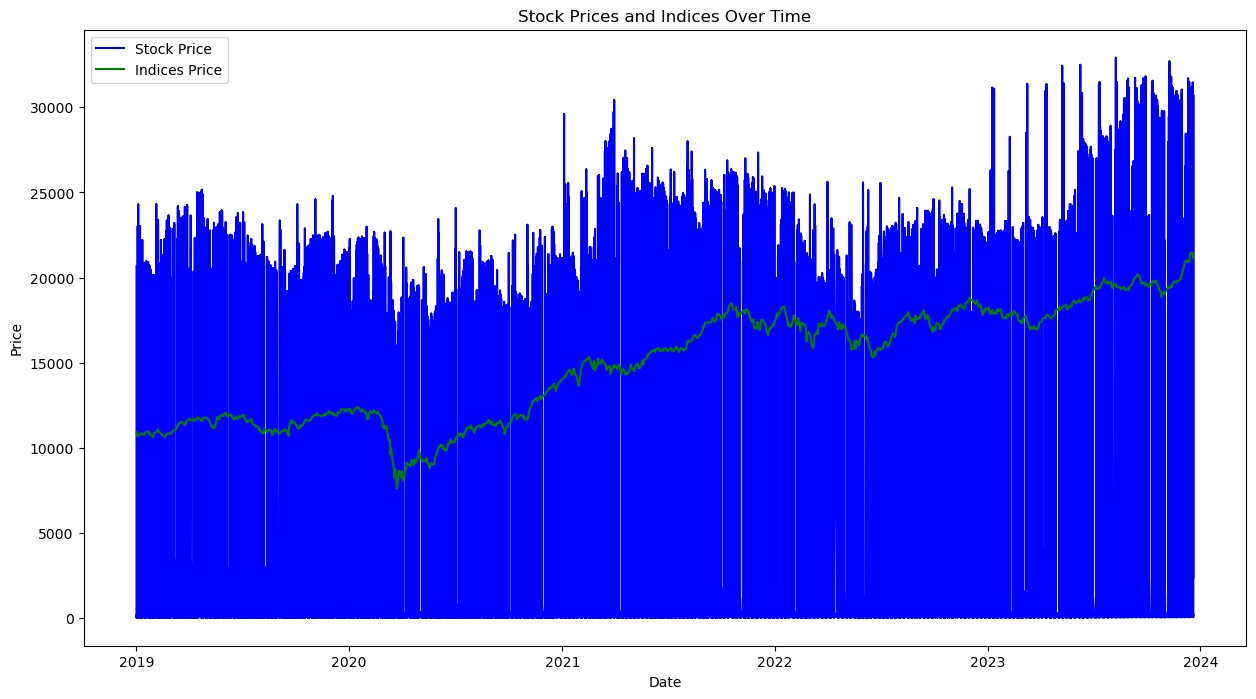

In [31]:

df2['DATE'] = pd.to_datetime(df2['DATE'])
df_niftyfifty['DATE'] = pd.to_datetime(df_niftyfifty['Date'])

# Merge the two DataFrames based on the 'DATE' column
merged_df = pd.merge(df2, df_niftyfifty, on='DATE', how='inner', suffixes=('_stock', '_indices'))

# Plot stock prices and indices over time
plt.figure(figsize=(15, 8))
plt.plot(merged_df['DATE'], merged_df['PRICE'], label='Stock Price', color='blue')
plt.plot(merged_df['DATE'], merged_df['Price'], label='Indices Price', color='green')

plt.title('Stock Prices and Indices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Company
3M India            0.072575
Bharat 22 ETF       0.012787
CONSUMBEES          0.011667
CPSE ETF            0.014535
Grasim              0.093229
Gujarat petronet    0.020937
ITC                 0.071772
Linde India         0.150864
MO M100 ETF         0.012997
MO M50 ETF          0.012205
Nippon              0.031128
SRF                 0.095023
Name: Daily_Return, dtype: float64


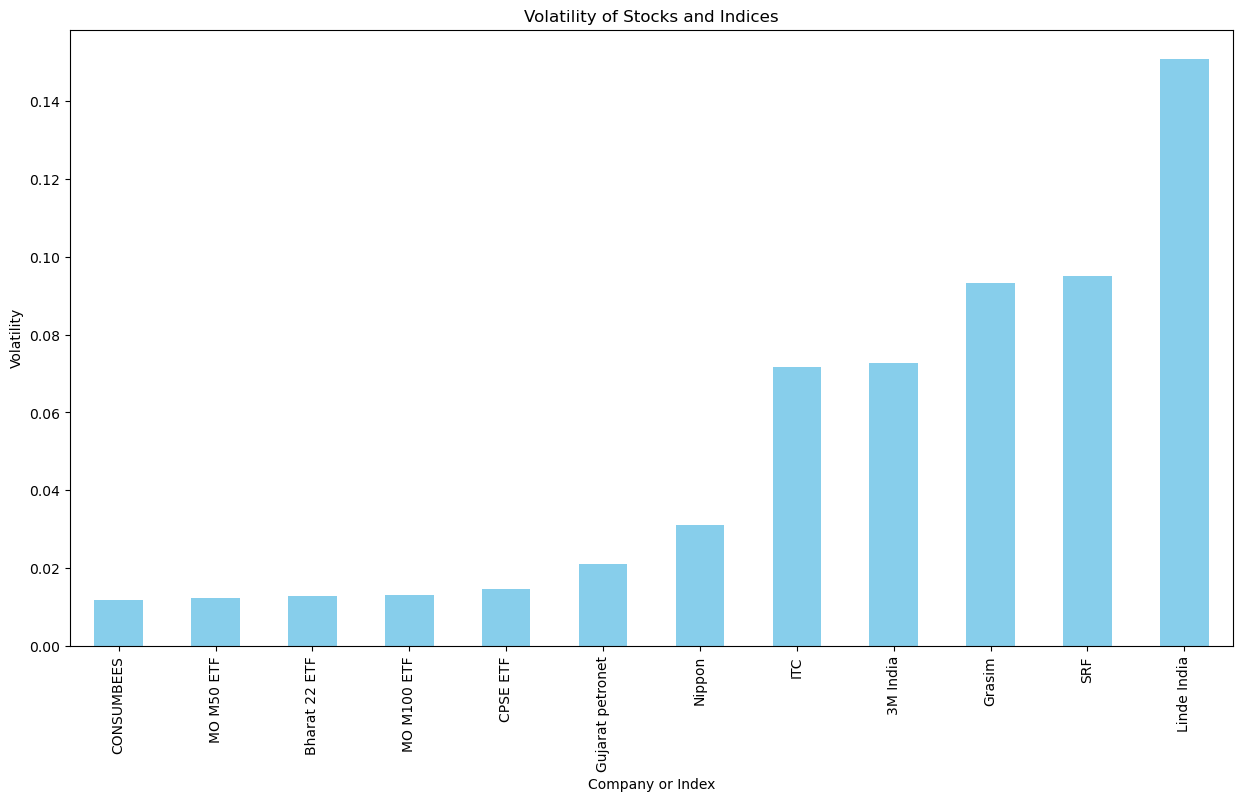

In [32]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Analyze volatility
print(volatility_df)

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')
plt.show()


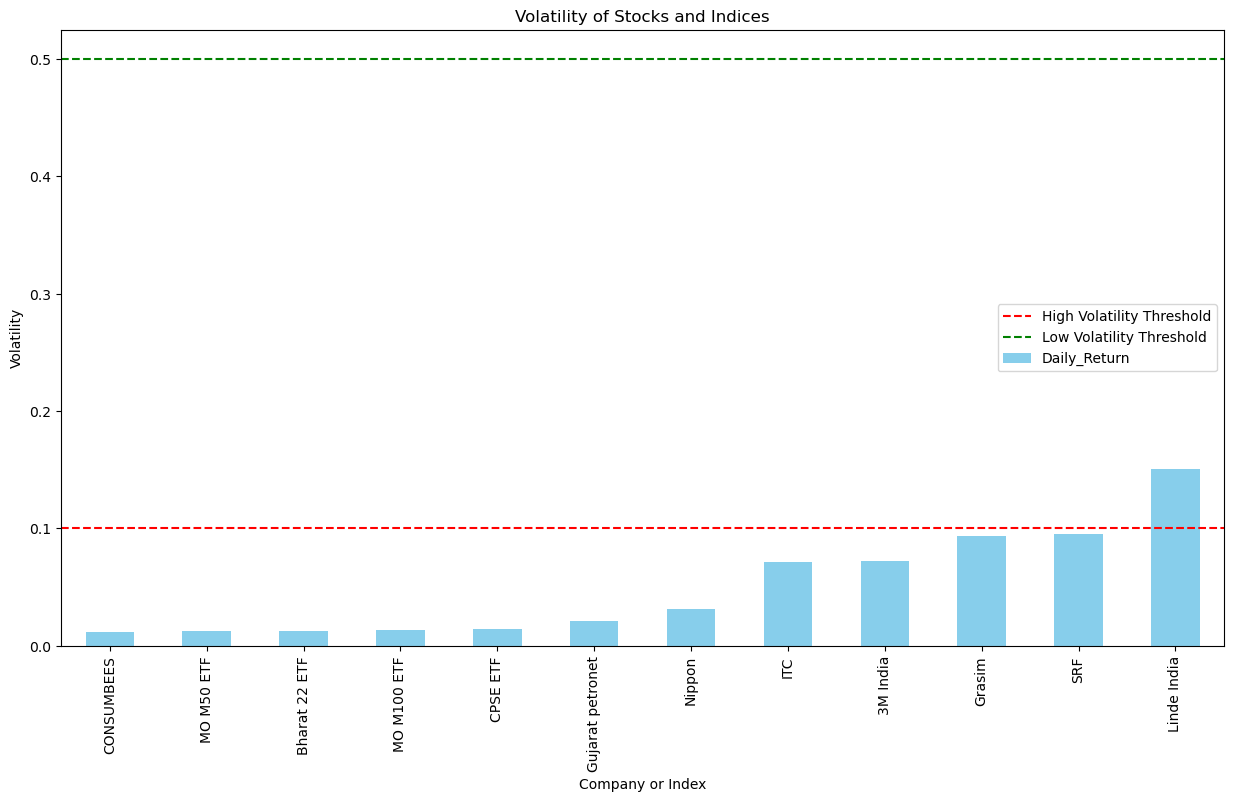

High Volatility Periods: Index(['Linde India'], dtype='object', name='Company')
Low Volatility Periods: Index(['3M India', 'Bharat 22 ETF', 'CONSUMBEES', 'CPSE ETF', 'Grasim',
       'Gujarat petronet', 'ITC', 'Linde India', 'MO M100 ETF', 'MO M50 ETF',
       'Nippon', 'SRF'],
      dtype='object', name='Company')


In [33]:

df2['DATE'] = pd.to_datetime(df2['DATE'])

# Calculate daily returns
df2['Daily_Return'] = df2.groupby('Company')['PRICE'].pct_change()

# Calculate volatility (standard deviation of daily returns)
volatility_df = df2.groupby('Company')['Daily_Return'].std()

# Set thresholds for high and low volatility
high_volatility_threshold = 0.1  # Adjust the threshold based on your data
low_volatility_threshold = 0.5  # Adjust the threshold based on your data

# Identify periods of high and low volatility
high_volatility_periods = volatility_df[volatility_df > high_volatility_threshold].index
low_volatility_periods = volatility_df[volatility_df < low_volatility_threshold].index

# Plot volatility
plt.figure(figsize=(15, 8))
volatility_df.sort_values().plot(kind='bar', color='skyblue')
plt.title('Volatility of Stocks and Indices')
plt.xlabel('Company or Index')
plt.ylabel('Volatility')

# Highlight high and low volatility periods
plt.axhline(y=high_volatility_threshold, color='red', linestyle='--', label='High Volatility Threshold')
plt.axhline(y=low_volatility_threshold, color='green', linestyle='--', label='Low Volatility Threshold')

plt.legend()
plt.show()

# Print periods of high and low volatility
print(f'High Volatility Periods: {high_volatility_periods}')
print(f'Low Volatility Periods: {low_volatility_periods}')
